In [1]:
import pandas as pd


import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage(df, x, y, xlabel):   
    counts = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    print(counts)
    g = sns.catplot(x=x, y='percent', hue=y, data=counts, kind='bar')
    
    g.set(xlabel = xlabel)
    
    new_title = 'Evasão'
    g._legend.set_title(new_title)
    # replace labels
    new_labels = ['Não', 'Sim']
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    plt.show()

def plot_time_bar(col_group, target, title):
    data = df.groupby(['time', col_group]).agg({target:'mean'}).reset_index()
    ax = sns.barplot(x='time', y=target, data=data, hue=col_group)
    ax.set(title=title) 

In [2]:
df = pd.read_csv('/home/ramon/extrator/retencaoretencao.csv')

df.columns


/home/ramon/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,14,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['matricula', 'periodoLetivo', 'n_rep', 'n_repf', 'n_apr', 'n_tra',
       'mediaFinal', 'anoIngresso', 'periodoingresso', 'prazoConclusao',
       'dataColacaoGrau', 'periodoAtual', 'dataIntegralizacao',
       'modalidadeVaga', 'dataConclusao', 'nomeDiscente', 'dataNascimento',
       'sexo', 'raca', 'cpf', 'ufNaturalidade', 'municipioNaturalidade',
       'segundoGrauAnoConclusao', 'tipoEnsinoMedio', 'formaIngresso',
       'statusDiscente', 'codigoInep', 'curso', 'curriculo', 'is_cotista',
       'periodo', 'anoNascimento', 'idade', 'gap', 'centro', 'municipio',
       'turno', 'is_outra_cidade', 'time', 'total', 'p_rep', 'p_repf', 'p_apr',
       'p_tra'],
      dtype='object')

# Q.1 - Sexo afeta a reprovação?

- Homens possuem maiores taxas de reprovação

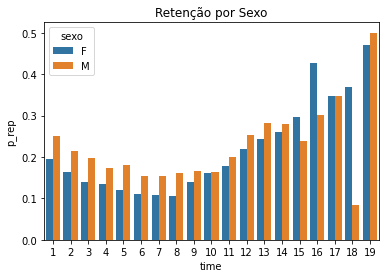

In [3]:
plot_time_bar('sexo', 'p_rep', 'Retenção por Sexo')   

# Q.2 - Forma de Ingresso (cotista ou ampla concorrência) impacta a reprovação?

- Cotistas possuem maior taxa de reprovação no primeiro semestre. Por quê? Deficiência basal?
- Parece que essa diferença se anula a partir do 3o semestre

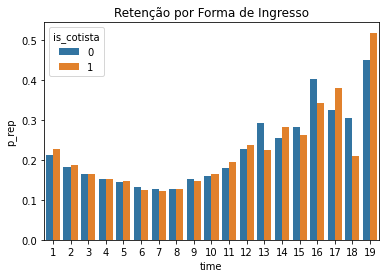

In [4]:
plot_time_bar('is_cotista', 'p_rep', 'Retenção por Forma de Ingresso')   

# Q.3 - Cidade de origem impacta a reprovação?

- Estudantes cuja cidade de origem é igual àquela do campus possuem maior taxa de reprovação.

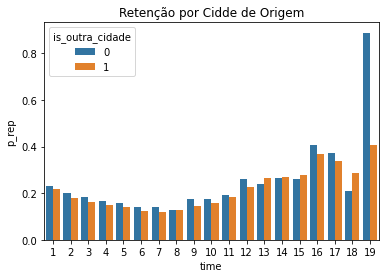

In [5]:
plot_time_bar('is_outra_cidade', 'p_rep', 'Retenção por Cidde de Origem')   

# Q.4 - Período de Ingresso (1o ou 2o edição do SISU) impacta a reprovação?

- Estudantes que ingreressam no 2o semestre tendem a possuir maior taxa de reprovação. Por quê? Desinteresse com o curso, deficiência basal?

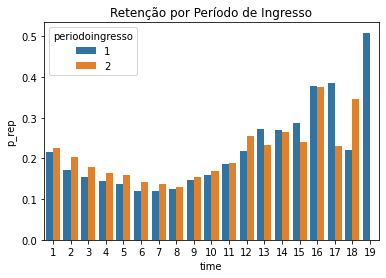

In [6]:
plot_time_bar('periodoingresso', 'p_rep', 'Retenção por Período de Ingresso')   